<a href="https://colab.research.google.com/github/morgwork/Distantly-Reading-IPCC-Reports/blob/main/IPCCM5_(4_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This codebook cleans and analyzes the fifth IPCC Working Group III report published in 2014. The  PDF is 1,451 pages, and a permanent link is available [here](https://archive.ipcc.ch/report/ar5/wg3/).**

## Cleaning
In this section, I clean the files for analysis. 

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
import string

all_punctuation = string.punctuation

print(f"All punctuation: {all_punctuation}")

All punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
# Remove stopwords function.

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

# Cleaning text function.
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [5]:
with open("/content/IPCC5M.txt", "r", encoding='utf-8') as text:
    IPCCM5 = text.read()

In [6]:
MC1=IPCCM5.lower() # remove casing
MC2=MC1
print(MC2[:500])

﻿climate change 2014 mitigation of climate change
working group iii contribution to the fifth assessment report of the intergovernmental panel on climate change
edited by		
ottmar edenhofer working group iii co-chair potsdam institute for climate impact research	ramon pichs-madruga working group iii co-chair centro de investigaciones de la econom^a mundial	youba sokona working group iii co-chair south centre
jan c. minx head of tsu	ellie farahani	susanne kadner head of operations	head of science


In [7]:
for p in all_punctuation:

  MC3=MC2.replace(p,'')

In [8]:
MC4=remove_Stopwords(MC3)

In [9]:
MC5=lemmatize_text(MC4)

In [10]:
MC6=clean_text(MC5)

## Analysis
In this section, I will analyze the cleaned files with some basic word counts to highlight significant terms. I will also create a few WordCloud visualizations for each report, one with all collocates true and two or three that remove disproportionately represented terms and bigrams.

In [11]:
IPCCM5words= MC6.split()
print('Number of words in IPCCM5:',len(IPCCM5words))

Number of words in IPCCM5: 772902


In [12]:
import time


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words("english")
time.sleep(5) 

word_tokens = nltk.word_tokenize(MC6)
MC7= [word for word in word_tokens if word not in stopword]
time.sleep(5) # this does not crash, but it will not print. may be more useful with even larger files. 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
print(MC7[:100])

['\ufeffclimate', 'change', '2014', 'mitigation', 'climate', 'change', 'working', 'group', 'iii', 'contribution', 'fifth', 'assessment', 'report', 'intergovernmental', 'panel', 'climate', 'change', 'edited', 'ottmar', 'edenhofer', 'working', 'group', 'iii', 'cochair', 'potsdam', 'institute', 'climate', 'impact', 'research', 'ramon', 'pichsmadruga', 'working', 'group', 'iii', 'cochair', 'centro', 'de', 'investigaciones', 'de', 'la', 'economa', 'mundial', 'youba', 'sokona', 'working', 'group', 'iii', 'cochair', 'south', 'centre', 'jan', 'c', 'minx', 'head', 'tsu', 'ellie', 'farahani', 'susanne', 'kadner', 'head', 'operation', 'head', 'science', 'kristin', 'seyboth', 'deputy', 'head', 'science', 'anna', 'adler', 'team', 'assistant', 'ina', 'baum', 'project', 'officer', 'steffen', 'brunner', 'senior', 'economist', 'patrick', 'eickemeier', 'scientific', 'editor', 'benjamin', 'kriemann', 'officer', 'jussi', 'savolainen', 'web', 'manager', 'steffen', 'schlomer', 'scientist', 'christoph', 'von

In [15]:
MC8= [word for word in MC7 if word.isalnum()] 

In [16]:
MC9=[x for x in MC8 if not (x.isdigit() 
                            or x[0] == '-' and x[1:].isdigit())] # good for eliminating numbers

In [17]:
print(MC9[:100])

['change', 'mitigation', 'climate', 'change', 'working', 'group', 'iii', 'contribution', 'fifth', 'assessment', 'report', 'intergovernmental', 'panel', 'climate', 'change', 'edited', 'ottmar', 'edenhofer', 'working', 'group', 'iii', 'cochair', 'potsdam', 'institute', 'climate', 'impact', 'research', 'ramon', 'pichsmadruga', 'working', 'group', 'iii', 'cochair', 'centro', 'de', 'investigaciones', 'de', 'la', 'economa', 'mundial', 'youba', 'sokona', 'working', 'group', 'iii', 'cochair', 'south', 'centre', 'jan', 'c', 'minx', 'head', 'tsu', 'ellie', 'farahani', 'susanne', 'kadner', 'head', 'operation', 'head', 'science', 'kristin', 'seyboth', 'deputy', 'head', 'science', 'anna', 'adler', 'team', 'assistant', 'ina', 'baum', 'project', 'officer', 'steffen', 'brunner', 'senior', 'economist', 'patrick', 'eickemeier', 'scientific', 'editor', 'benjamin', 'kriemann', 'officer', 'jussi', 'savolainen', 'web', 'manager', 'steffen', 'schlomer', 'scientist', 'christoph', 'von', 'stechow', 'scientist'

In [18]:
from nltk import FreqDist
freq = FreqDist(MC9)
print(freq.most_common(100))

[('energy', 8695), ('emission', 7840), ('climate', 6773), ('et', 6354), ('al', 6342), ('change', 5604), ('policy', 5366), ('mitigation', 4237), ('j', 3923), ('country', 3099), ('global', 2980), ('doi', 2936), ('cost', 2891), ('technology', 2839), ('development', 2735), ('issn', 2698), ('carbon', 2606), ('r', 2587), ('e', 2584), ('g', 2401), ('c', 2370), ('international', 2301), ('chapter', 2251), ('environmental', 2233), ('scenario', 2207), ('use', 2171), ('economic', 2117), ('available', 2097), ('p', 1995), ('http', 1987), ('system', 1958), ('section', 1955), ('see', 1878), ('also', 1866), ('impact', 1816), ('ghg', 1754), ('sector', 1730), ('k', 1715), ('co2', 1702), ('fuel', 1686), ('pp', 1677), ('l', 1554), ('b', 1545), ('reduction', 1542), ('building', 1516), ('level', 1497), ('study', 1465), ('model', 1463), ('new', 1461), ('transport', 1459), ('h', 1458), ('potential', 1447), ('land', 1434), ('effect', 1420), ('national', 1409), ('efficiency', 1404), ('may', 1396), ('urban', 1353

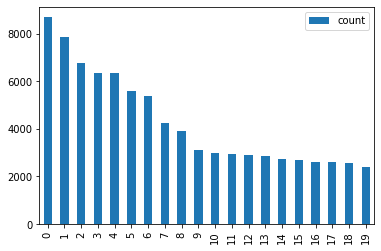

In [19]:
import pandas as pd

df = pd.DataFrame(list(freq.most_common(20)))
df.columns =['word', 'count']
df.plot(kind='bar');

In [20]:
print(df)

           word  count
0        energy   8695
1      emission   7840
2       climate   6773
3            et   6354
4            al   6342
5        change   5604
6        policy   5366
7    mitigation   4237
8             j   3923
9       country   3099
10       global   2980
11          doi   2936
12         cost   2891
13   technology   2839
14  development   2735
15         issn   2698
16       carbon   2606
17            r   2587
18            e   2584
19            g   2401


In [21]:
MC11=freq.most_common(100)
MC11

[('energy', 8695),
 ('emission', 7840),
 ('climate', 6773),
 ('et', 6354),
 ('al', 6342),
 ('change', 5604),
 ('policy', 5366),
 ('mitigation', 4237),
 ('j', 3923),
 ('country', 3099),
 ('global', 2980),
 ('doi', 2936),
 ('cost', 2891),
 ('technology', 2839),
 ('development', 2735),
 ('issn', 2698),
 ('carbon', 2606),
 ('r', 2587),
 ('e', 2584),
 ('g', 2401),
 ('c', 2370),
 ('international', 2301),
 ('chapter', 2251),
 ('environmental', 2233),
 ('scenario', 2207),
 ('use', 2171),
 ('economic', 2117),
 ('available', 2097),
 ('p', 1995),
 ('http', 1987),
 ('system', 1958),
 ('section', 1955),
 ('see', 1878),
 ('also', 1866),
 ('impact', 1816),
 ('ghg', 1754),
 ('sector', 1730),
 ('k', 1715),
 ('co2', 1702),
 ('fuel', 1686),
 ('pp', 1677),
 ('l', 1554),
 ('b', 1545),
 ('reduction', 1542),
 ('building', 1516),
 ('level', 1497),
 ('study', 1465),
 ('model', 1463),
 ('new', 1461),
 ('transport', 1459),
 ('h', 1458),
 ('potential', 1447),
 ('land', 1434),
 ('effect', 1420),
 ('national', 1409

In [22]:
MC11[-15:]

[('future', 1026),
 ('high', 1019),
 ('isbn', 1016),
 ('measure', 1014),
 ('social', 1002),
 ('market', 999),
 ('environment', 985),
 ('consumption', 974),
 ('electricity', 973),
 ('management', 969),
 ('price', 945),
 ('review', 934),
 ('many', 925),
 ('region', 925),
 ('range', 923)]

In [23]:
MC10=','.join(MC9)
import pandas as pd
df=pd.DataFrame({'author': ['IPCC'], 'report': MC10}) 
df

,author,report
0,IPCC,"change,mitigation,climate,change,working,group..."


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud

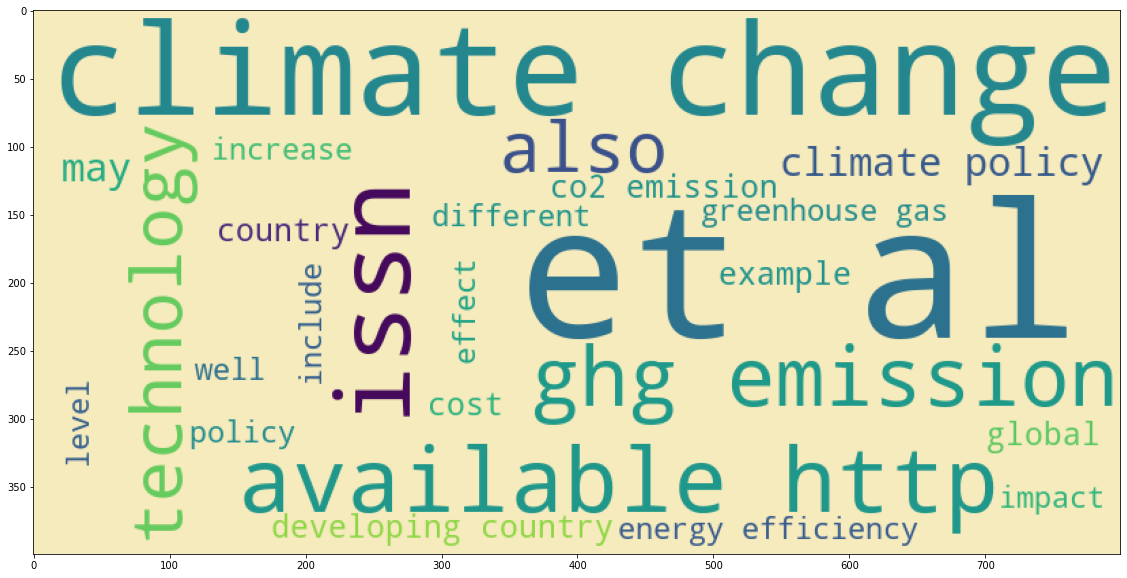

In [25]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=[]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # basic cloud

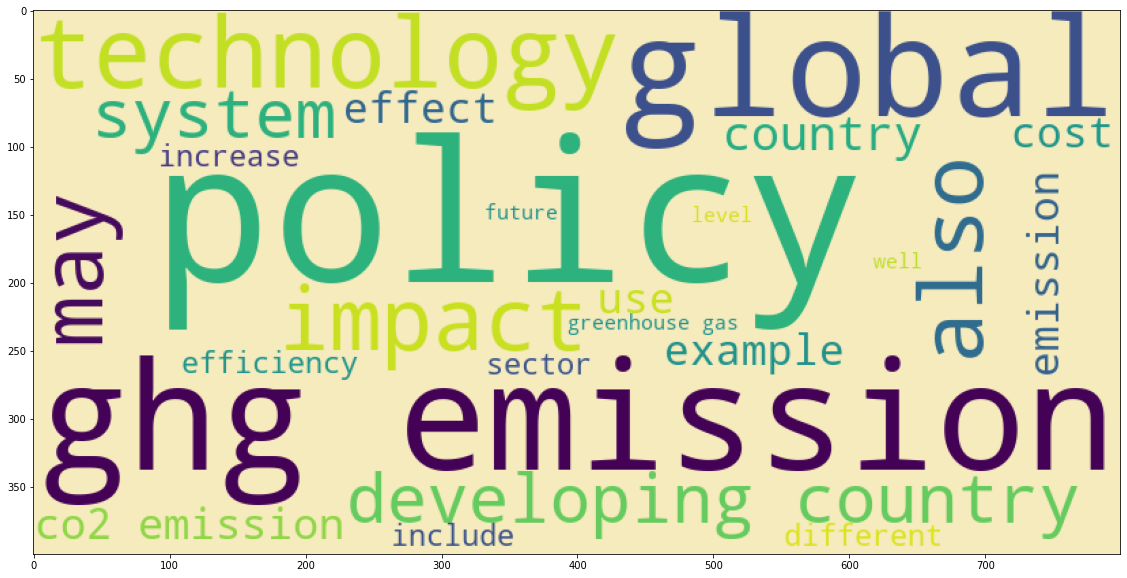

In [26]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["climate", "change", "energy", "et", "al", "however", "http", "issn"]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # removing some of the more prominent terms

# can remove words with the stopwords function in first line. because it reads for bigrams, have to remove individual terms 

# add ",collocations=False" before generate function in first line to stop bigrams and focus on individual terms; must be in parentheses

# change max_words number to increase or limit terms

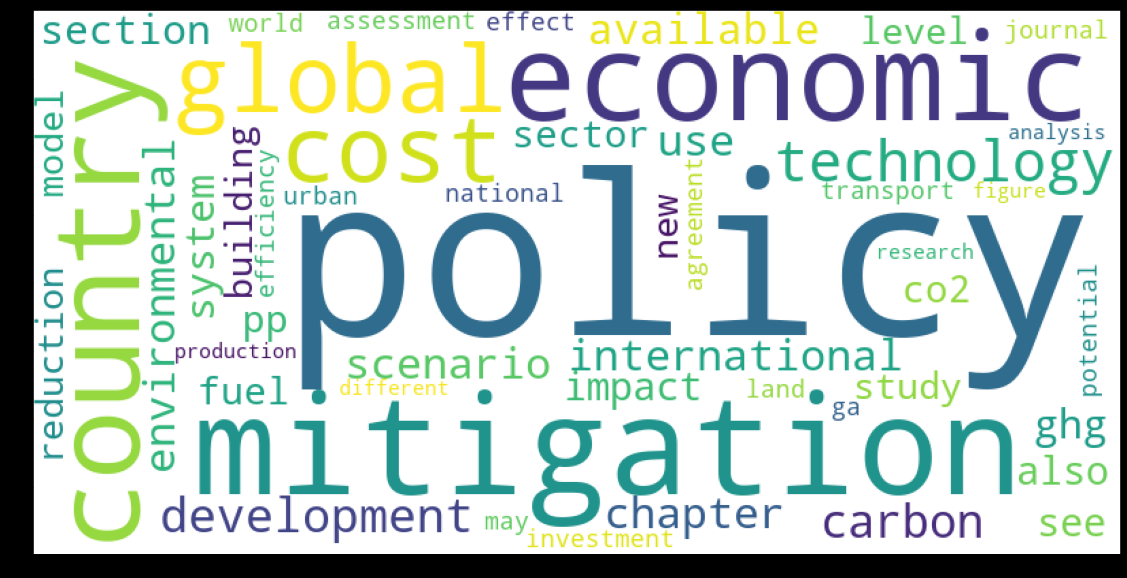

In [27]:
wordcloud_ab = WordCloud(background_color="white",max_words=50, width=800, height=400,stopwords=["emission", "doi", "climate", "change", "energy", "et", "al", "however", "http", "issn"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and stopwords

In [28]:
occurrences = MC10.count("urban")
print("Number of times the word \'urban\' appears:", occurrences)

Number of times the word 'urban' appears: 1766
